# Assignment 2
Malak Selim 900201482

In [123]:
import numpy as np
import pandas as pd
import scipy.stats
import scipy
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import norm,t
from statsmodels.stats.proportion import proportion_confint
from pandas.api.types import CategoricalDtype


# Part 1: Statistical comparison of football teams preformance


In [124]:
df=pd.read_csv("results.csv")
df  

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
43183,2/1/2022,Suriname,Guyana,2,1,Friendly,Paramaribo,Suriname,False
43184,2/2/2022,Burkina Faso,Senegal,1,3,African Cup of Nations,Yaoundé,Cameroon,True
43185,2/3/2022,Cameroon,Egypt,0,0,African Cup of Nations,Yaoundé,Cameroon,False
43186,2/5/2022,Cameroon,Burkina Faso,3,3,African Cup of Nations,Yaoundé,Cameroon,False


In [125]:
df['country'].value_counts()

United States          1237
France                  818
Malaysia                744
England                 717
Sweden                  655
                       ... 
Belgian Congo             1
Portuguese Guinea         1
Bohemia and Moravia       1
Lautoka                   1
Mali Federation           1
Name: country, Length: 267, dtype: int64

In [126]:
x=df['home_score']-df['away_score']
conditions = [(x<0),(x>0),(x==0)]
values= ['win','lose','draw']
df['result'] = np.select(conditions, values)
x=df['result'].value_counts()
x

lose    21009
win     12224
draw     9955
Name: result, dtype: int64

In [127]:
x=np.array(x)
x

array([21009, 12224,  9955], dtype=int64)

In [128]:
conditions = [ (df['tournament']=='Friendly'),(df['tournament']!='Friendly')]
values=['Friendly','Official']
df['typematch'] = np.select(conditions, values)
x=pd.crosstab(df['typematch'],df['result'],margins=True)
x

result,draw,lose,win,All
typematch,,,,
Friendly,4329,8141,4806,17276
Official,5626,12868,7418,25912
All,9955,21009,12224,43188


In [129]:
x=np.array(x)
x

array([[ 4329,  8141,  4806, 17276],
       [ 5626, 12868,  7418, 25912],
       [ 9955, 21009, 12224, 43188]], dtype=int64)

In [130]:
CI_win_friendly=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))
CI_win_friendly

(0.27150736589666685, 0.2848714254902283)

In [131]:
CI_win_official=proportion_confint(count=x[1,2],nobs=x[1,3],alpha=(1-.95))
CI_win_official

(0.2807729187467606, 0.29178033843138085)

In [132]:
ci_win = {}
ci_win['Typematch'] = ['Friendly','Official']
ci_win['lb'] = [CI_win_friendly[0],CI_win_official[0]]
ci_win['ub'] = [CI_win_friendly[1],CI_win_official[1]]
df_ci3= pd.DataFrame(ci_win)
df_ci3

,Typematch,lb,ub
0,Friendly,0.271507,0.284871
1,Official,0.280773,0.291780


In [133]:
ci_lose = {}
ci_lose['Typematch'] = ['Friendly','Official']
ci_lose['lb'] = [CI_lose_friendly[0],CI_lose_official[0]]
ci_lose['ub'] = [CI_lose_friendly[1],CI_lose_official[1]]
df_ci4= pd.DataFrame(ci_lose)
df_ci4

,Typematch,lb,ub
0,Friendly,0.463788,0.478675
1,Official,0.490516,0.502692


([<matplotlib.axis.YTick at 0x21860a3ccd0>,
 [Text(0, 0, 'Friendly'), Text(0, 1, 'Official')])

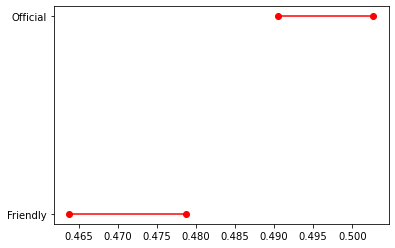

In [134]:
for lb,ub,y in zip(df_ci4['lb'],df_ci4['ub'],range(len(df_ci4))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci4)),list(df_ci4['Typematch']))

##### Country 1: France

In [135]:
dfus=df[df['country']=='France']

In [136]:
conditions = [(dfus['tournament']=='Friendly'),(dfus['tournament']!='Friendly')] 
values=['Friendly','Official']

In [137]:
dfus['Typematch'] = np.select(conditions, values)

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_21004/327193532.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfus['Typematch'] = np.select(conditions, values)


In [138]:
x=pd.crosstab(dfus['typematch'],dfus['result'],margins=True)
x

result,draw,lose,win,All
typematch,,,,
Friendly,112,228,131,471
Official,77,189,81,347
All,189,417,212,818


In [139]:
x=np.array(x)
x

array([[112, 228, 131, 471],
       [ 77, 189,  81, 347],
       [189, 417, 212, 818]], dtype=int64)

In [140]:
CI_uswin_friendly=proportion_confint(count=x[1,2],nobs=x[1,3],alpha=(1-.95))
CI_uswin_friendly

(0.18892148425887595, 0.27793730536648426)

In [141]:
CI_uswin_official=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))
CI_uswin_official

(0.2376654895121334, 0.3185977801269324)

In [142]:
ci_uswin = {}
ci_uswin['Typematch'] = ['Friendly','Official']
ci_uswin['lb'] = [CI_uswin_friendly[0],CI_uswin_official[0]]
ci_uswin['ub'] = [CI_uswin_friendly[1],CI_uswin_official[1]]
df_cius= pd.DataFrame(ci_uswin)
df_cius

,Typematch,lb,ub
0,Friendly,0.188921,0.277937
1,Official,0.237665,0.318598


([<matplotlib.axis.YTick at 0x2185ff87c70>,
 [Text(0, 0, 'Friendly'), Text(0, 1, 'Official')])

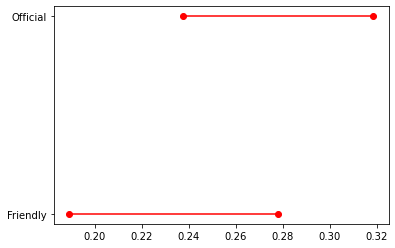

In [143]:
for lb,ub,y in zip(df_cius['lb'],df_cius['ub'],range(len(df_cius))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_cius)),list(df_cius['Typematch']))

In [144]:
CI_uslose_friendly=proportion_confint(count=x[0,1],nobs=x[0,3],alpha=(1-.95))
CI_uslose_friendly

(0.43894415137605935, 0.5292087148659789)

In [145]:
CI_uslose_official=proportion_confint(count=x[1,1],nobs=x[1,3],alpha=(1-.95))
CI_uslose_official

(0.4922707551354989, 0.5970664206570083)

In [146]:
ci_uslose = {}
ci_uslose['Typematch'] = ['Friendly','Official']
ci_uslose['lb'] = [CI_uslose_friendly[0],CI_uslose_official[0]]
ci_uslose['ub'] = [CI_uslose_friendly[1],CI_uslose_official[1]]
df_cius= pd.DataFrame(ci_uslose)
df_cius

,Typematch,lb,ub
0,Friendly,0.438944,0.529209
1,Official,0.492271,0.597066


([<matplotlib.axis.YTick at 0x2185ffe8460>,
 [Text(0, 0, 'Friendly'), Text(0, 1, 'Official')])

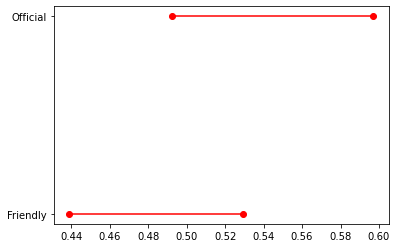

In [147]:
for lb,ub,y in zip(df_cius['lb'],df_cius['ub'],range(len(df_cius))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_cius)),list(df_cius['Typematch']))

In [148]:
dfus['home']=(dfus['home_team']=='France')

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_21004/2708661334.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfus['home']=(dfus['home_team']=='France')


In [149]:
 x=pd.crosstab(dfus['home'],dfus['result'],margins=True)
x

result,draw,lose,win,All
home,,,,
False,100,157,118,375
True,89,260,94,443
All,189,417,212,818


In [150]:
x=np.array(x)
x

array([[100, 157, 118, 375],
       [ 89, 260,  94, 443],
       [189, 417, 212, 818]], dtype=int64)

In [151]:
CI_uswin_home=proportion_confint(count=x[1,2],nobs=x[1,3],alpha=(1-.95))
CI_uswin_home

(0.17411643713822142, 0.2502627953674219)

In [152]:
CI_uswin_away=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))
CI_uswin_away

(0.2676654873825878, 0.3616678459507455)

In [153]:
ci_uswin = {}
ci_uswin['home'] = ['Yes','No']
ci_uswin['lb'] = [CI_uswin_home[0],CI_uswin_away[0]]
ci_uswin['ub'] = [CI_uswin_home[1],CI_uswin_away[1]]
df_ci= pd.DataFrame(ci_uswin)
df_ci

,home,lb,ub
0,Yes,0.174116,0.250263
1,No,0.267665,0.361668


([<matplotlib.axis.YTick at 0x21860048a30>,
 [Text(0, 0, 'Yes'), Text(0, 1, 'No')])

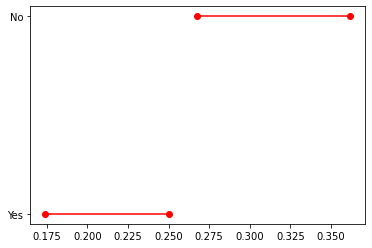

In [154]:
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['home']))

In [155]:
CI_uslose_home=proportion_confint(count=x[1,1],nobs=x[1,3],alpha=(1-.95))
CI_uslose_home

(0.541055825404375, 0.6327590730154896)

In [156]:
CI_uslose_away=proportion_confint(count=x[0,1],nobs=x[0,3],alpha=(1-.95))
CI_uslose_away

(0.36873463210645324, 0.46859870122688013)

In [157]:
ci_uslose = {}
ci_uslose['home'] = ['Yes','No']
ci_uslose['lb'] = [CI_uslose_home[0],CI_uslose_away[0]]
ci_uslose['ub'] = [CI_uslose_home[1],CI_uslose_away[1]]
df_ci= pd.DataFrame(ci_uslose)
df_ci

,home,lb,ub
0,Yes,0.541056,0.632759
1,No,0.368735,0.468599


([<matplotlib.axis.YTick at 0x218600a7b80>,
 [Text(0, 0, 'Yes'), Text(0, 1, 'No')])

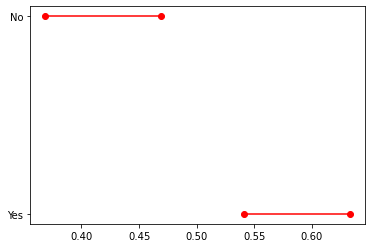

In [158]:
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['home']))

##### Country 2 : United States

In [159]:
dfus=df[df['country']=='United States']

In [160]:
conditions = [
    (dfus['tournament']=='Friendly'),
    (dfus['tournament']!='Friendly')
    ]

In [161]:
dfus['Typematch'] = np.select(conditions, values)

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_21004/327193532.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfus['Typematch'] = np.select(conditions, values)


In [162]:
x=pd.crosstab(dfus['typematch'],dfus['result'],margins=True)
x

result,draw,lose,win,All
typematch,,,,
Friendly,180,247,226,653
Official,114,315,155,584
All,294,562,381,1237


In [163]:
x=np.array(x)
x

array([[ 180,  247,  226,  653],
       [ 114,  315,  155,  584],
       [ 294,  562,  381, 1237]], dtype=int64)

In [164]:
CI_uswin_friendly=proportion_confint(count=x[1,2],nobs=x[1,3],alpha=(1-.95))
CI_uswin_friendly

(0.22959939266607973, 0.30122252514213943)

In [165]:
CI_uswin_official=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))
CI_uswin_official

(0.3096072474351973, 0.38258264536725295)

In [166]:
ci_uswin = {}
ci_uswin['Typematch'] = ['Friendly','Official']
ci_uswin['lb'] = [CI_uswin_friendly[0],CI_uswin_official[0]]
ci_uswin['ub'] = [CI_uswin_friendly[1],CI_uswin_official[1]]
df_cius= pd.DataFrame(ci_uswin)
df_cius

,Typematch,lb,ub
0,Friendly,0.229599,0.301223
1,Official,0.309607,0.382583


([<matplotlib.axis.YTick at 0x21860110970>,
 [Text(0, 0, 'Friendly'), Text(0, 1, 'Official')])

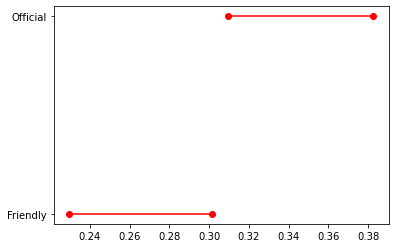

In [167]:
for lb,ub,y in zip(df_cius['lb'],df_cius['ub'],range(len(df_cius))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_cius)),list(df_cius['Typematch']))

In [168]:
CI_uslose_friendly=proportion_confint(count=x[0,1],nobs=x[0,3],alpha=(1-.95))
CI_uslose_friendly

(0.3410587617395715, 0.4154496609250533)

In [169]:
CI_uslose_official=proportion_confint(count=x[1,1],nobs=x[1,3],alpha=(1-.95))
CI_uslose_official

(0.4989576113893054, 0.5798095118983658)

In [170]:
 ci_uslose = {}
ci_uslose['Typematch'] = ['Friendly','Official']
ci_uslose['lb'] = [CI_uslose_friendly[0],CI_uslose_official[0]]
ci_uslose['ub'] = [CI_uslose_friendly[1],CI_uslose_official[1]]
df_cius= pd.DataFrame(ci_uslose)
df_cius

,Typematch,lb,ub
0,Friendly,0.341059,0.41545
1,Official,0.498958,0.57981


([<matplotlib.axis.YTick at 0x2186016dd00>,
 [Text(0, 0, 'Friendly'), Text(0, 1, 'Official')])

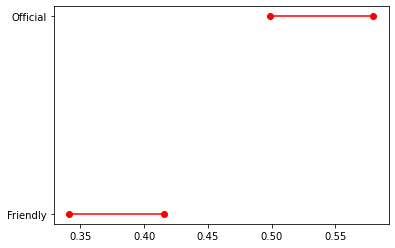

In [171]:
for lb,ub,y in zip(df_cius['lb'],df_cius['ub'],range(len(df_cius))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_cius)),list(df_cius['Typematch']))

In [172]:
dfus['home']=(dfus['home_team']=='United States')

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_21004/3054155073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfus['home']=(dfus['home_team']=='United States')


In [173]:
x=pd.crosstab(dfus['home'],dfus['result'],margins=True)
x

result,draw,lose,win,All
home,,,,
False,203,333,290,826
True,91,229,91,411
All,294,562,381,1237


In [174]:
x=np.array(x)
x

array([[ 203,  333,  290,  826],
       [  91,  229,   91,  411],
       [ 294,  562,  381, 1237]], dtype=int64)

In [175]:
CI_uswin_home=proportion_confint(count=x[1,2],nobs=x[1,3],alpha=(1-.95))
CI_uswin_home

(0.1812708525133201, 0.26155153191490377)

In [176]:
CI_uswin_away=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))
CI_uswin_away

(0.31853895723001224, 0.3836402195254357)

In [177]:
ci_uswin = {}
ci_uswin['home'] = ['Yes','No']
ci_uswin['lb'] = [CI_uswin_home[0],CI_uswin_away[0]]
ci_uswin['ub'] = [CI_uswin_home[1],CI_uswin_away[1]]
df_ci= pd.DataFrame(ci_uswin)
df_ci

,home,lb,ub
0,Yes,0.181271,0.261552
1,No,0.318539,0.383640


([<matplotlib.axis.YTick at 0x218601cc940>,
 [Text(0, 0, 'Yes'), Text(0, 1, 'No')])

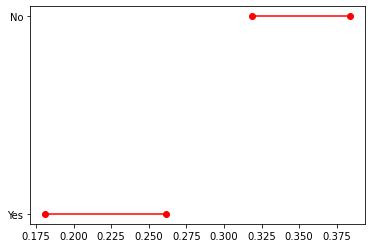

In [178]:
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['home']))

In [179]:
CI_uslose_home=proportion_confint(count=x[1,1],nobs=x[1,3],alpha=(1-.95))
CI_uslose_home

(0.5091557759095878, 0.6051994552339645)

In [180]:
CI_uslose_away=proportion_confint(count=x[0,1],nobs=x[0,3],alpha=(1-.95))
CI_uslose_away

(0.3696955835778047, 0.4365998159379338)

In [181]:
ci_uslose = {}
ci_uslose['home'] = ['Yes','No']
ci_uslose['lb'] = [CI_uslose_home[0],CI_uslose_away[0]]
ci_uslose['ub'] = [CI_uslose_home[1],CI_uslose_away[1]]
df_ci= pd.DataFrame(ci_uslose)
df_ci

,home,lb,ub
0,Yes,0.509156,0.605199
1,No,0.369696,0.436600


([<matplotlib.axis.YTick at 0x2186022f640>,
 [Text(0, 0, 'Yes'), Text(0, 1, 'No')])

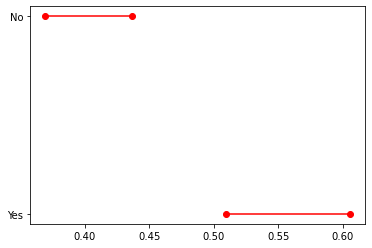

In [182]:
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['home']))

##### Country 3 : Malaysia

In [188]:
dfus=df[df['country']=='Malaysia']

In [189]:
conditions = [(dfus['tournament']=='Friendly'),(dfus['tournament']!='Friendly')] 
values=['Friendly','Official']

In [190]:
dfus['Typematch'] = np.select(conditions, values)

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_21004/327193532.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfus['Typematch'] = np.select(conditions, values)


In [191]:
x=pd.crosstab(dfus['typematch'],dfus['result'],margins=True)
x

result,draw,lose,win,All
typematch,,,,
Friendly,26,38,23,87
Official,147,306,204,657
All,173,344,227,744


In [192]:
x=np.array(x)
x

array([[ 26,  38,  23,  87],
       [147, 306, 204, 657],
       [173, 344, 227, 744]], dtype=int64)

In [193]:
CI_uswin_friendly=proportion_confint(count=x[1,2],nobs=x[1,3],alpha=(1-.95))
CI_uswin_friendly

(0.2751217623066649, 0.3458828039033807)

In [194]:
CI_uswin_official=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))
CI_uswin_official

(0.17170123991784997, 0.3570343922660581)

In [195]:
ci_uswin = {}
ci_uswin['Typematch'] = ['Friendly','Official']
ci_uswin['lb'] = [CI_uswin_friendly[0],CI_uswin_official[0]]
ci_uswin['ub'] = [CI_uswin_friendly[1],CI_uswin_official[1]]
df_cius= pd.DataFrame(ci_uswin)
df_cius

,Typematch,lb,ub
0,Friendly,0.275122,0.345883
1,Official,0.171701,0.357034


([<matplotlib.axis.YTick at 0x21860292370>,
 [Text(0, 0, 'Friendly'), Text(0, 1, 'Official')])

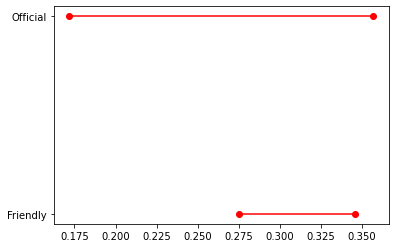

In [196]:
for lb,ub,y in zip(df_cius['lb'],df_cius['ub'],range(len(df_cius))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_cius)),list(df_cius['Typematch']))

In [197]:
CI_uslose_friendly=proportion_confint(count=x[0,1],nobs=x[0,3],alpha=(1-.95))
CI_uslose_friendly

(0.3325596937938109, 0.5410035245969937)

In [198]:
CI_uslose_official=proportion_confint(count=x[1,1],nobs=x[1,3],alpha=(1-.95))
CI_uslose_official

(0.42761047206364666, 0.5038963772514218)

In [199]:
ci_uslose = {}
ci_uslose['Typematch'] = ['Friendly','Official']
ci_uslose['lb'] = [CI_uslose_friendly[0],CI_uslose_official[0]]
ci_uslose['ub'] = [CI_uslose_friendly[1],CI_uslose_official[1]]
df_cius= pd.DataFrame(ci_uslose)
df_cius

,Typematch,lb,ub
0,Friendly,0.33256,0.541004
1,Official,0.42761,0.503896


([<matplotlib.axis.YTick at 0x2186037e9d0>,
 [Text(0, 0, 'Friendly'), Text(0, 1, 'Official')])

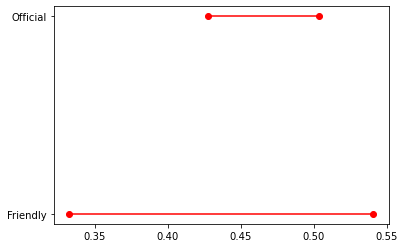

In [203]:
for lb,ub,y in zip(df_cius['lb'],df_cius['ub'],range(len(df_cius))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_cius)),list(df_cius['Typematch']))

In [205]:
 dfus['home']=(dfus['home_team']=='Malaysia')

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_21004/3556067377.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfus['home']=(dfus['home_team']=='Malaysia')


In [206]:
x=pd.crosstab(dfus['home'],dfus['result'],margins=True)
x

result,draw,lose,win,All
home,,,,
False,104,215,151,470
True,69,129,76,274
All,173,344,227,744


In [207]:
x=np.array(x)
x

array([[104, 215, 151, 470],
       [ 69, 129,  76, 274],
       [173, 344, 227, 744]], dtype=int64)

In [208]:
CI_uswin_home=proportion_confint(count=x[1,2],nobs=x[1,3],alpha=(1-.95))
CI_uswin_home

(0.2243617948137066, 0.33038273073373864)

In [209]:
CI_uswin_away=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))
CI_uswin_away

(0.2790598143842422, 0.36349337710511953)

In [210]:
ci_uswin = {}
ci_uswin['home'] = ['Yes','No']
ci_uswin['lb'] = [CI_uswin_home[0],CI_uswin_away[0]]
ci_uswin['ub'] = [CI_uswin_home[1],CI_uswin_away[1]]
df_ci= pd.DataFrame(ci_uswin)
df_ci

,home,lb,ub
0,Yes,0.224362,0.330383
1,No,0.279060,0.363493


([<matplotlib.axis.YTick at 0x218603d5e50>,
 [Text(0, 0, 'Yes'), Text(0, 1, 'No')])

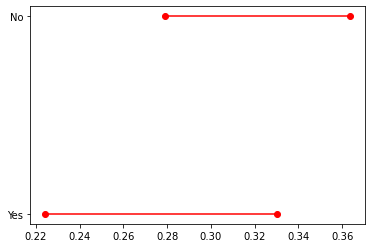

In [211]:
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['home']))

In [212]:
CI_uslose_home=proportion_confint(count=x[1,1],nobs=x[1,3],alpha=(1-.95))
CI_uslose_home

(0.4117010659354705, 0.5299047734805878)

In [213]:
CI_uslose_away=proportion_confint(count=x[0,1],nobs=x[0,3],alpha=(1-.95))
CI_uslose_away

(0.41240761302700635, 0.5024860039942702)

In [214]:
ci_uslose = {}
ci_uslose['home'] = ['Yes','No']
ci_uslose['lb'] = [CI_uslose_home[0],CI_uslose_away[0]]
ci_uslose['ub'] = [CI_uslose_home[1],CI_uslose_away[1]]
df_ci= pd.DataFrame(ci_uslose)
df_ci

,home,lb,ub
0,Yes,0.411701,0.529905
1,No,0.412408,0.502486


([<matplotlib.axis.YTick at 0x2185f60edc0>,
 [Text(0, 0, 'Yes'), Text(0, 1, 'No')])

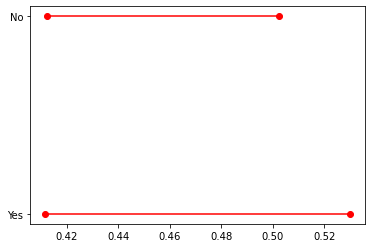

In [216]:
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['home']))

To conclude, this code to calculate the 95 percent confidence interval for won and lost matches for friendly and official matches . After computing the different confidence intervals for the 3 countries France, Malaysia and the United States we can see that  both match styles, the confidence interval for winning was completely different. The interval for winning an official match is less than that in a friendly match. As a result, there is a large margin of error for winning a friendly match, and the chances of winning a friendly match are higher than the chances of winning an official match. Similarly, in friendly matchups, the likelihood of losing a match is higher as well as the margin of error.

# Part 2 : Analysis for reported covid cases 2020-2021

In [ ]:
df=pd.read_csv('covid_data.csv',encoding='latin-1')

In [ ]:
df

In [ ]:
cats=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
cat_type=CategoricalDtype(categories=cats,ordered=True)
df['month']=df['month'].astype(cat_type)

In [ ]:
def get_ci_lb(x, alpha=0.05):
    sample_mean=np.mean(x)
    sample_std=np.std(x)
    sample_size=len(x)
    margin_of_error = t.ppf(1 - alpha/2,sample_size-1)*sample_std/np.sqrt(sample_size-1)
    return sample_mean - margin_of_error


def get_ci_ub(x, alpha=0.05):
    sample_mean=np.mean(x)
    sample_std=np.std(x)
    sample_size=len(x)
    margin_of_error = t.ppf(1 - alpha/2,sample_size-1)*sample_std/np.sqrt(sample_size-1)
    return sample_mean + margin_of_error

In [ ]:
 df['year']=pd.DatetimeIndex(df['date']).year
 df['year'][0]

In [ ]:
df['date']=pd.to_datetime(df['date'],format='%Y-%m-%d')
df['date'][0]

In [ ]:
df['totcases'] = df.groupby(['iso3c'])['dcases'].cumsum() 
df['totdeaths'] = df.groupby(['iso3c'])['ddeaths'].cumsum()
ratio=df['totdeaths']/df['totcases']
df['ratio']=ratio

In [ ]:
df

In [ ]:
continent_year=df.groupby(['continent','year']).agg({"ratio": [np.mean, np.std, np.size,get_ci_lb,get_ci_ub]})

continent_year=continent_year.reset_index()

continent_year= pd.DataFrame(continent_year)

continent_year

In [ ]:
 income_year=df.groupby(['income','year']).agg({"ratio": [np.mean, np.std, np.size,get_ci_lb,get_ci_ub]})

income_year=income_year.reset_index()

income_year= pd.DataFrame(income_year)

income_year

In [ ]:
region_year=df.groupby(['region','year']).agg({"ratio": [np.mean, np.std, np.size,get_ci_lb,get_ci_ub]})

region_year=region_year.reset_index()

region_year= pd.DataFrame(region_year)

region_year

In [ ]:
continent_year20=continent_year[(continent_year['year']==2020)]
continent_year21=continent_year[(continent_year['year']==2021)]

continent_year20.columns=['continent','year','mean','std','size','get_ci_lb','get_ci_ub']
continent_year21.columns=['continent','year','mean','std','size','get_ci_lb','get_ci_ub']

In [ ]:
 for lb,ub,y in zip(continent_year20['get_ci_lb'],continent_year20['get_ci_ub'],range(len(continent_year))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(continent_year20)),list(continent_year20['continent']))
plt.xlabel("Ratio")
plt.ylabel("Continent")
plt.title("Continents ratio 2020")

In [ ]:
 for lb,ub,y in zip(continent_year21['get_ci_lb'],continent_year21['get_ci_ub'],range(len(continent_year))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(continent_year21)),list(continent_year21['continent']))
plt.xlabel("Ratio")
plt.ylabel("Continent")
plt.title("Continents ratio 2021")

In [ ]:
region_year20=region_year[(region_year['year']==2020)]
region_year21=region_year[(region_year['year']==2021)]

region_year20.columns=['continent','year','mean','std','size','get_ci_lb','get_ci_ub']
region_year21.columns=['continent','year','mean','std','size','get_ci_lb','get_ci_ub']

In [ ]:
for lb,ub,y in zip(region_year20['get_ci_lb'],region_year20['get_ci_ub'],range(len(region_year20))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(region_year20)),list(region_year20['continent']))
plt.xlabel("Ratio")
plt.ylabel("Region")
plt.title("Regions ratio 2020")

In [ ]:
for lb,ub,y in zip(region_year21['get_ci_lb'],region_year21['get_ci_ub'],range(len(region_year21))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(region_year21)),list(region_year21['continent']))
plt.xlabel("Ratio")
plt.ylabel("Region")
plt.title("Regions ratio 2021")

In [ ]:
income_year20=income_year[(income_year['year']==2020)]
income_year21=income_year[(income_year['year']==2021)]

 
income_year20.columns=['continent','year','mean','std','size','get_ci_lb','get_ci_ub']
income_year21.columns=['continent','year','mean','std','size','get_ci_lb','get_ci_ub']

In [ ]:
 for lb,ub,y in zip(income_year20['get_ci_lb'],income_year20['get_ci_ub'],range(len(income_year20))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(income_year20)),list(income_year20['continent']))
plt.xlabel("Ratio")
plt.ylabel("Income")
plt.title("Income ratio 2020")

In [ ]:
for lb,ub,y in zip(income_year21['get_ci_lb'],income_year21['get_ci_ub'],range(len(income_year21))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(income_year21)),list(income_year21['continent']))
plt.xlabel("Ratio")
plt.ylabel("Income")
plt.title("Income ratio 2021")

To conclude,this code shows us the ratio between covid cases and death in 2020 and 2021. The comparisons where done based on the continent, region and income. We can see that the ratio for 2021 decreases comparing to the ratio in 2020.South America had the highest ratio by continent in 2020 and 2021, but the margin of error in 2020 was greater than in 2021 which justifies that it was affected the most.For income, the low income class had the highest ratio in both 2020 and 2021, but higher margin or error in 2020 justfying the high number of infections.